In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [19]:
# ------------------------------------------------------------------
def changeIntensityResolution(img, bits):
    h, w = img.shape
    new = np.zeros([h, w], dtype=np.uint8) # an empty image holder
    multiplier = 2**(8 - bits)  # reduce bits based on multiplier
    for row in range(h):
        for col in range(w):
            val = img[row, col]
            new[row, col] = float(val/multiplier) # divide original by multiplier, normalize the values
            val = new[row, col]
            new[row, col] = val*(multiplier) # scale the values : multiply new value with the multiplier
    return new

# ------------------------------------------------------------------

## Read Image

In [15]:
# Read the image file
img = cv2.imread("Lena.tiff", 0) # load image as grayscale image

## Image Spatial Resolution


 Original Image shape : (512, 512)


 Images after Spatial resolution changes : 


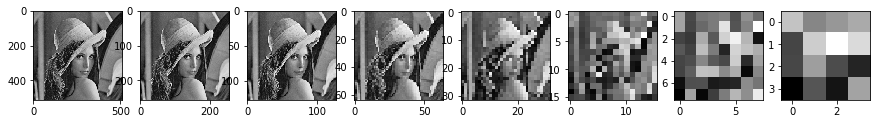

In [16]:
print('\n Original Image shape : {}'.format(img.shape))

print('\n\n Images after Spatial resolution changes : ')
# Play with spatial resolution and plot the images
fig1 = plt.figure(figsize=(15, 15))
fig1.add_subplot(1, 8, 1)
plt.imshow(img, cmap="gray") # plot the original image

resized1=img
# Changing Spatial resolution by resizing images
for i in range(2,9):
 resized2 = resized1[::2,::2] # resize image by selecting alternate pixel
 fig1.add_subplot(1, 8, i)  # 1 x 8 plotting canvas
 plt.imshow(resized2, cmap="gray") # plot resized images
 resized1=resized2 
plt.show()


## Image Intensity Resolution



 Images after Intensity resolution changes : 


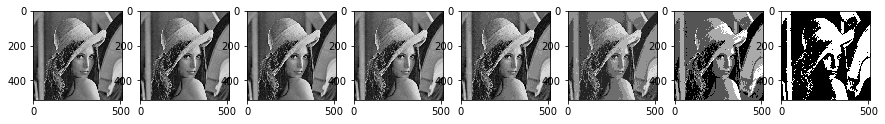

In [17]:
# Play with intensity resolution and plot all the resultant images
print('\n\n Images after Intensity resolution changes : ')
fig2 = plt.figure(figsize=(15, 15))
for i in range(8, 0, -1):
    out = changeIntensityResolution(img, i)
    fig2.add_subplot(1, 8, 8-i+1) # 1 x 8 plotting canvas
    plt.imshow(out, cmap="gray")
plt.show()


## Image Histogram



 Histogram of the modified images : 


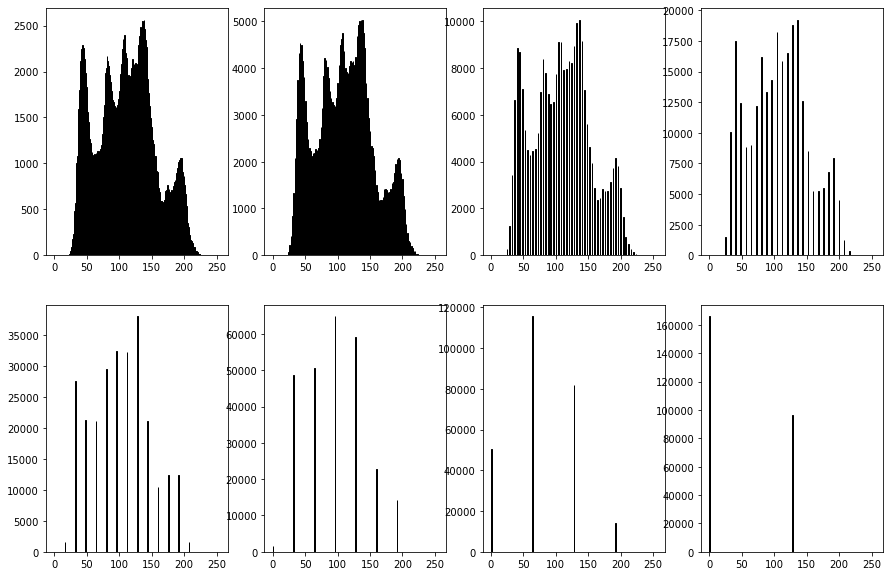

In [18]:
# Plot Histograms of the images
print('\n\n Histogram of the modified images : ')
fig3 = plt.figure(figsize=(15, 10))

for i in range(1, 9): 
    out = changeIntensityResolution(img, 8-i+1)
    fig3.add_subplot(2, 4, i)   # 2 x 4 plotting canvas
    plt.hist(out.ravel(), bins=256, range=(0.0, 255), fc='k', ec='k')
plt.show()